<a href="https://colab.research.google.com/github/Hevin12/Advanced-House-Price-Prediction-/blob/master/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import lib and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
object_columns = []
num_columns=[]
for i in df.columns:
  if df[i].dtype == 'O':
    object_columns.append(i)
  else:
    num_columns.append(i)

In [ ]:
df["GarageCars"].unique()

array([2, 3, 1, 0, 4])

In [ ]:
df.shape

(1460, 81)

**Relationship with numerical variables**
in this part we are analysis the relationship between target value and some selected columns



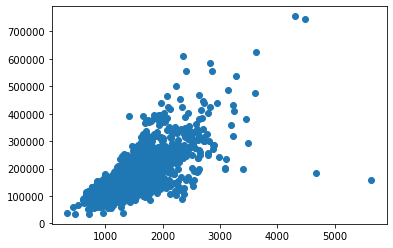

In [ ]:
plt.scatter(x=df["GrLivArea"],y=df["SalePrice"])

By viewing this scatterplot we can clearly see that GrLivArea and seleprice are highly correlated with each other

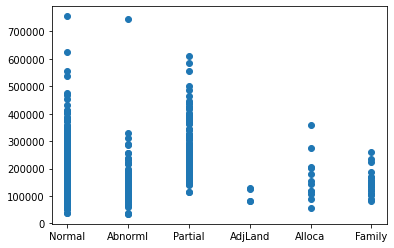

In [ ]:
plt.scatter(x=df["SaleCondition"],y=df["SalePrice"])



By viewing this scatterplot we can clearly see people are more interested in by a normal ,partial ,abnormal condition home

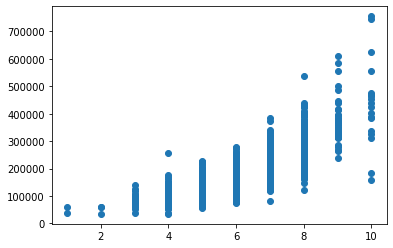

In [ ]:
plt.scatter(x=df["OverallQual"],y=df["SalePrice"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


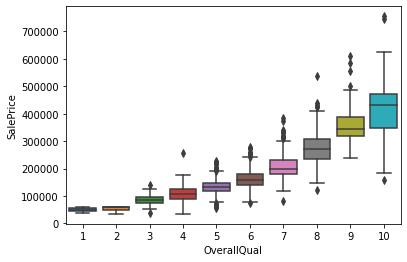

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


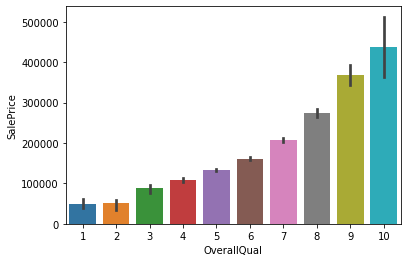

In [ ]:
sns.boxplot(df['OverallQual'], df['SalePrice'])
plt.show()
sns.barplot(df['OverallQual'], df['SalePrice'])
plt.show()

over all quality and sell Price are correlated with each other.
if any house quality is good then its price is also high in compare to other house.

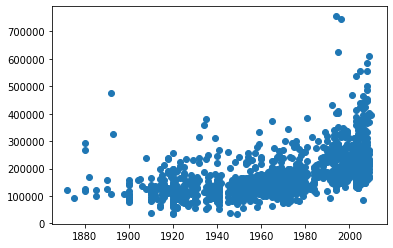

In [ ]:
plt.scatter(x=df["YearBuilt"],y=df["SalePrice"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


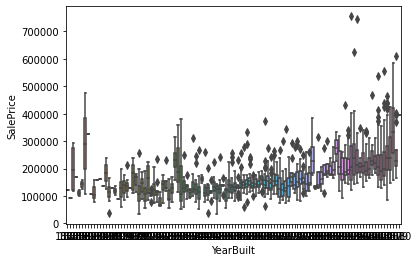

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


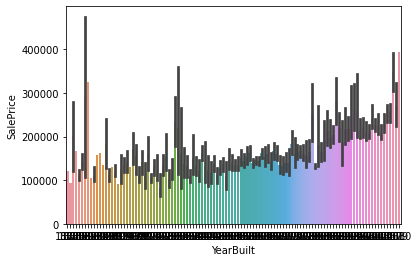

In [ ]:
sns.boxplot(df['YearBuilt'], df['SalePrice'])
plt.show()
sns.barplot(df['YearBuilt'], df['SalePrice'])
plt.show()


people are try spend  more money in new stuff than in old one.

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


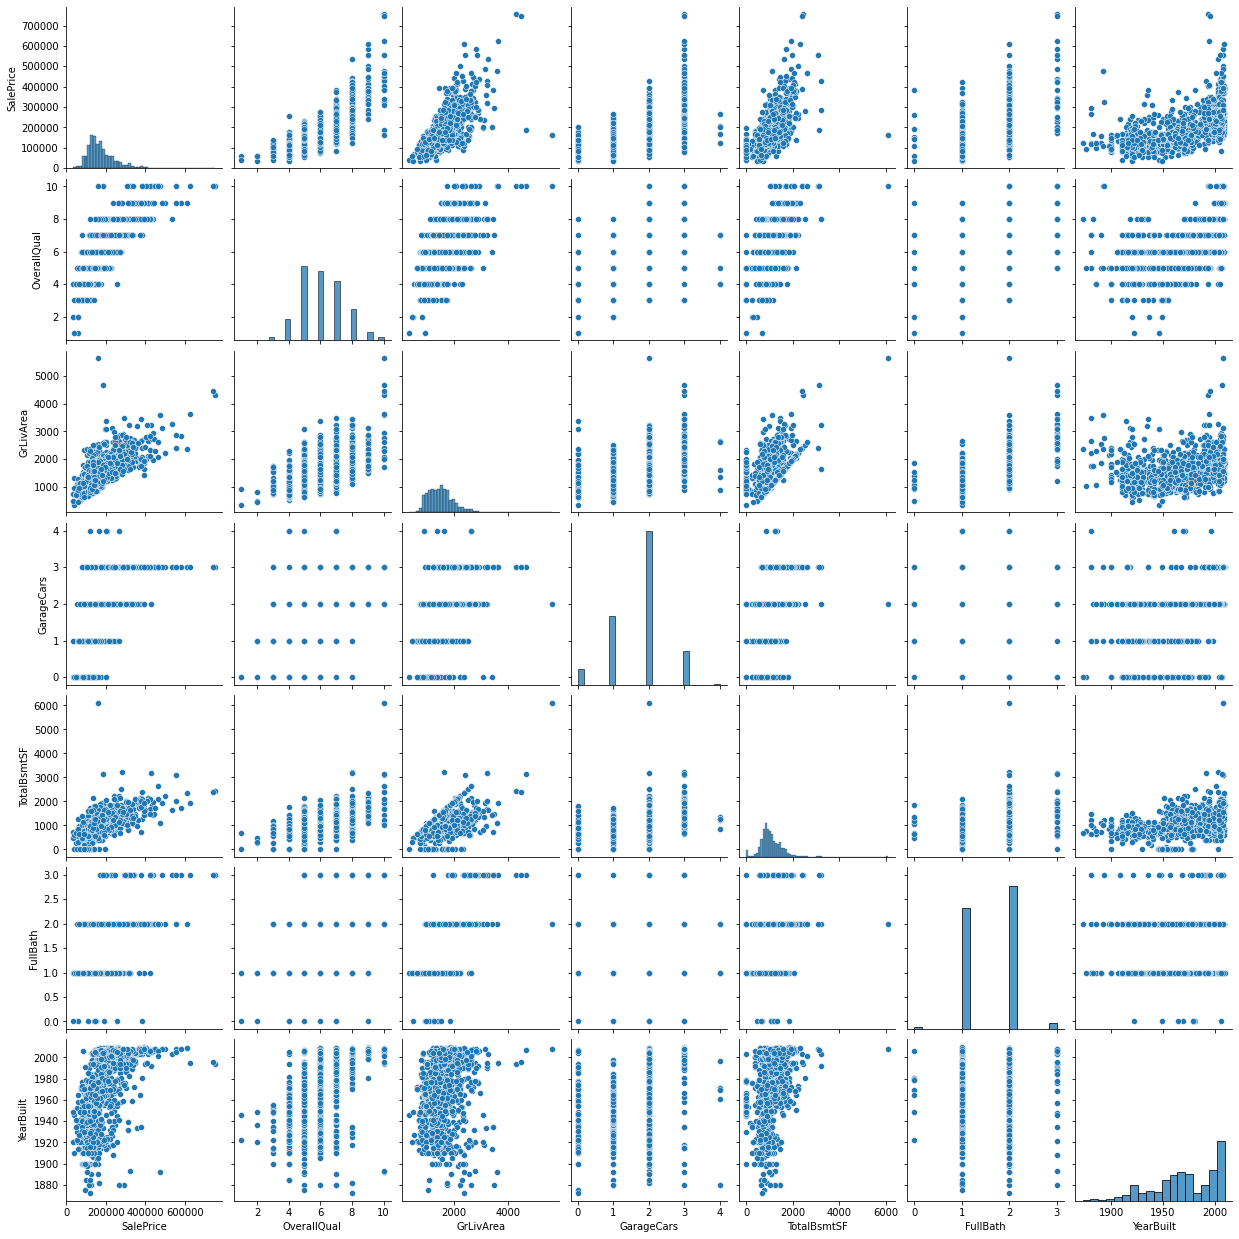

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [ ]:
df['SalePrice'].skew()

1.8828757597682129

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


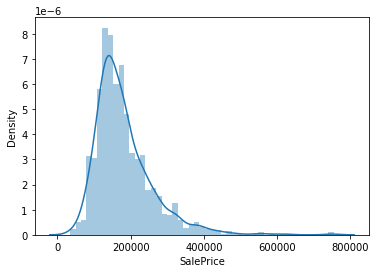

In [ ]:
sns.distplot(df["SalePrice"])


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

[Condition1,Condition2] [OverallQual,OverallCond] [Exterior1st,Exterior2nd] [ExterQual,ExterCond] [BsmtQual,BsmtCond,BsmtExposure] [BsmtFinType1,BsmtFinType2] [GarageQual,GarageCond]
 this all have same value

Label encoding

in below we can see that this all columns have NA means none and here none is one of the category

In [ ]:
none_cols = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
none_cols

['Alley',
 'PoolQC',
 'MiscFeature',
 'Fence',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'MasVnrType']

in below we can see that this all columns have NA means 0.

In [ ]:
zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']
zero_cols

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageArea',
 'GarageCars',
 'MasVnrArea']

while here NA means something is missing

In [ ]:
freq_cols = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual','SaleType', 'Utilities']
freq_cols

['Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'KitchenQual',
 'SaleType',
 'Utilities']

In [ ]:
for col in zero_cols:
    df[col].replace(np.nan, 0, inplace=True)

for col in none_cols:
    df[col].replace(np.nan, 'None', inplace=True)

for col in freq_cols:
    df[col].replace(np.nan, df[col].mode()[0], inplace=True)

df["LotFrontage"] = df["LotFrontage"].fillna(np.mean(df["LotFrontage"]))
df.isnull().sum().sum()

0

here we merge all bathroom into one so we can easily understand

In [ ]:
df["TotalBathrooms"]=df["BsmtFullBath"]+(0.5*df["BsmtHalfBath"])+(0.5*df["HalfBath"])+df["FullBath"]

here we merge all squrefoot area into one so we can easily understand

In [ ]:
df["TotalSqFt"]=df["BsmtFinSF2"]+df["1stFlrSF"]+df["2ndFlrSF"]+df["BsmtFinSF1"]+df["BsmtFinSF2"]

In [ ]:
df['Age_House']= (df['YrSold']-df['YearBuilt'])


In [ ]:
box=['Gd', 'TA' ,'Ex' , 'Fa']
box2=['TA', 'Gd',  'Fa', 'Po']
co=0
for j,k in zip(df["BsmtQual"],df["BsmtCond"]):
  if j not in box and k in box2:
    co=co+1
print(co)  

0


In [ ]:


remove_able=[]
for col in object_columns:
  val=df[col].value_counts()
  fin=(max(val)/len(df[col]))*100
  
  if fin>90:
    print(fin,col)
    remove_able.append(col)


print(remove_able)

99.58904109589041 Street
93.76712328767123 Alley
99.93150684931507 Utilities
94.65753424657535 LandSlope
98.97260273972603 Condition2
98.21917808219179 RoofMatl
97.80821917808218 Heating
93.4931506849315 CentralAir
91.43835616438356 Electrical
93.15068493150685 Functional
90.82191780821918 GarageCond
91.78082191780823 PavedDrive
99.52054794520548 PoolQC
96.30136986301369 MiscFeature
['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature']


In [ ]:
features_nom = ["MSSubClass", "MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition"]


In [ ]:

ordered_colu = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "LotShape",
    "LandSlope",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Functional",
    "GarageFinish",
    "PavedDrive",
    "Utilities",
    "CentralAir",
    "Electrical",
    "Fence"
]

In [ ]:
for j in ordered_colu:
  print(j,df[j].unique())
  

ExterQual ['Gd' 'TA' 'Ex' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual ['Gd' 'TA' 'Ex' 'None' 'Fa']
BsmtCond ['TA' 'Gd' 'None' 'Fa' 'Po']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageQual ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
GarageCond ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
PoolQC ['None' 'Ex' 'Fa' 'Gd']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandSlope ['Gtl' 'Mod' 'Sev']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
Functional ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
GarageFinish ['RFn' 'Unf' 'Fin' 'None']
PavedDrive ['Y' 'N' 'P']
Utilities ['AllPub' 'NoSeWa']
CentralAir ['Y' 'N']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Fence ['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [ ]:

df.Functional    =[0 if each=='Sal' else 1 if each=="Sev" else 2 if each=="Maj2" else 3 if each=="Maj1" else 4 if each=="Mod" else 5 if each=="Min2" else 6 if each=="Min1" else 7 for each in df.Functional]
df.BsmtExposure  =[0 if each=='None' else 1 if each=="No" else 2 if each=="Mn" else 3 if each=="Av" else 4 for each in df.BsmtExposure  ]
df.LandSlope  =[0 if each=='Sev' else 1 if each=="Mod" else 2 for each in df.LandSlope  ]
df.Electrical  =[0 if each=='Mix' else 1 if each=="FuseP" else 2 if each=="FuseF" else 3 if each=="FuseA" else 4 for each in df.Electrical  ]
df.Utilities =[0 if each=='AllPub' else 1 for each in df.Utilities ]
df.CentralAir=[0 if each=='N' else 1 for each in df.CentralAir]
df.ExterQual=[0 if each=='Fa' else 1 if each=="TA" else 2 if each=="Gd" else 3 for each in df.ExterQual]
df.ExterCond =[0 if each=='Po' else 1 if each=="Fa" else 2 if each=="TA" else 3 if each=="Gd" else 4 for each in df.ExterCond ]
df.BsmtQual =[0 if each=='None' else 1 if each=="Fa" else 2 if each=="TA" else 3 if each=="Gd" else 4 for each in df.BsmtQual ]

df.BsmtCond  =[0 if each=='None' else 1 if each=="Fa" else 2 if each=="TA" else 3 if each=="Gd" else 4 for each in df.BsmtCond  ]

df.HeatingQC  =[0 if each=='Po' else 1 if each=="Fa" else 2 if each=="TA" else 3 if each=="Gd" else 4 for each in df.HeatingQC  ]
df.KitchenQual =[0 if each=='Fa' else 1 if each=="TA" else 2 if each=="Gd" else 3 for each in df.KitchenQual ]
df.PoolQC =[0 if each=='None' else 1 if each=="Fa" else 2 if each=="Gd" else 3 for each in df.PoolQC ]
df.FireplaceQu  =[0 if each=='None' else 1 if each=="Po" else 2 if each=="Fa" else 3 if each=="TA" else 4 if each=="Gd" else 5 for each in df.FireplaceQu  ]
df.GarageQual  =[0 if each=='None' else 1 if each=="Po" else 2 if each=="Fa" else 3 if each=="TA" else 4 if each=="Gd" else 5 for each in df.GarageQual  ]
df.GarageCond   =[0 if each=='None' else 1 if each=="Po" else 2 if each=="Fa" else 3 if each=="TA" else 4 if each=="Gd" else 5 for each in df.GarageCond   ]
df.LotShape =[0 if each=='IR3' else 1 if each=="IR2" else 2 if each=="IR1" else 3 for each in df.LotShape ]
df.BsmtFinType1   =[0 if each=='None' else 1 if each=="Unf" else 2 if each=="LwQ" else 3 if each=="Rec" else 4 if each=="BLQ" else 5 if each=="ALQ" else 6 for each in df.BsmtFinType1   ]
df.BsmtFinType2   =[0 if each=='None' else 1 if each=="Unf" else 2 if each=="LwQ" else 3 if each=="Rec" else 4 if each=="BLQ" else 5 if each=="ALQ" else 6 for each in df.BsmtFinType2]
df.Fence  =[0 if each=='None' else 1 if each=="MnWw" else 2 if each=="GdWo" else 3 if each=="MnPrv" else 4 for each in df.Fence  ]
df.GarageFinish=[0 if each=='None' else 1 if each=="Unf " else 2 if each=="RFn" else 3 for each in df.GarageFinish]
df.PavedDrive=[0 if each=='N' else 1 if each=="P" else 2 for each in df.PavedDrive]


In [ ]:
for j in ordered_colu:
  print(j,df[j].unique())

ExterQual [2 1 3 0]
ExterCond [2 3 1 0 4]
BsmtQual [3 2 4 0 1]
BsmtCond [2 3 0 1 4]
HeatingQC [4 3 2 1 0]
KitchenQual [2 1 3 0]
FireplaceQu [0 3 4 2 5 1]
GarageQual [3 2 4 0 5 1]
GarageCond [3 2 0 4 1 5]
PoolQC [0 3 1 2]
LotShape [3 2 1 0]
LandSlope [2 1 0]
BsmtExposure [1 4 2 3 0]
BsmtFinType1 [6 5 1 3 4 0 2]
BsmtFinType2 [1 4 0 5 3 2 6]
Functional [7 6 3 5 4 2 1]
GarageFinish [2 3 0]
PavedDrive [2 0 1]
Utilities [0 1]
CentralAir [1 0]
Electrical [4 2 3 1 0]
Fence [0 3 2 4 1]


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in features_nom:
    df[i]=le.fit_transform(df[i])


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBathrooms,TotalSqFt,Age_House
0,1,5,3,65.0,8450,1,1,3,3,0,4,2,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,2,2,3,2,1,6,706,1,0,150,856,1,...,854,0,1710,1,0,2,1,3,1,2,8,7,0,0,1,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,1,0,2,2008,8,4,208500,3.5,2416,5
1,2,0,3,80.0,9600,1,1,3,3,0,2,2,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,1,2,1,3,2,4,5,978,1,0,284,1262,1,...,0,0,1262,0,1,2,0,3,1,1,6,7,1,3,1,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,0,1,0,5,2007,8,4,181500,2.5,2240,31
2,3,5,3,68.0,11250,1,1,2,3,0,4,2,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,2,2,3,2,2,6,486,1,0,434,920,1,...,866,0,1786,1,0,2,1,3,1,2,6,7,1,3,1,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,0,1,0,9,2008,8,4,223500,3.5,2272,7
3,4,6,3,60.0,9550,1,1,2,3,0,0,2,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,1,2,0,2,3,1,5,216,1,0,540,756,1,...,756,0,1717,1,0,1,0,3,1,2,7,7,1,4,5,1998.0,3,3,642,3,3,2,0,35,272,0,0,0,0,0,1,0,2,2006,8,0,140000,2.0,1933,91
4,5,5,3,84.0,14260,1,1,2,3,0,2,2,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,2,2,3,2,3,6,655,1,0,490,1145,1,...,1053,0,2198,1,0,2,1,4,1,2,9,7,1,3,1,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,0,1,0,12,2008,8,4,250000,3.5,2853,8


In [ ]:
remove_able

['Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature']

In [ ]:
unwanted_columns=["BsmtFullBath","BsmtHalfBath","HalfBath","FullBath","BsmtFinSF2","1stFlrSF","2ndFlrSF","BsmtFinSF1","GarageCars",'YrSold','YearBuilt','Heating','RoofMatl','Condition2','Street','Utilities']
unwanted_columns=unwanted_columns+remove_able
print(len(unwanted_columns))

30


In [ ]:
num_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
num_df = df[num_columns]
corrmat = num_df.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.018745,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.013491,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.018745,1.000000,-0.308758,-0.132505,0.056546,-0.060795,0.033544,0.039944,0.031444,-0.073706,-0.072990,-0.137092,-0.241548,-0.233980,0.359167,0.051697,0.131017,0.001790,0.013119,0.166707,0.208262,0.026335,0.323390,0.107517,-0.019405,-0.064286,-0.009126,-0.074673,-0.002892,0.003643,-0.005194,-0.044435,-0.017886,0.020837,-0.006062,0.007052,-0.022100,-0.054751
LotFrontage,-0.009601,-0.308758,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.100259,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.132505,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.056546,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.060795,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.033544,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.039944,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.031444,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.073706,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.0

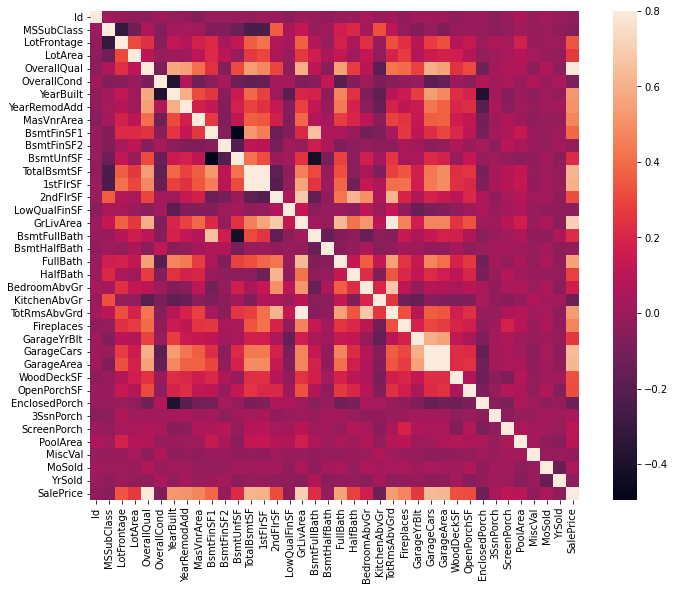

In [ ]:

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
corrmat["SalePrice"][(abs(corrmat["SalePrice"])<0.3)]

Id              -0.021917
MSSubClass      -0.054751
LotArea          0.263843
OverallCond     -0.077856
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
LowQualFinSF    -0.025606
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
GarageYrBlt      0.261366
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

In [ ]:
Low_corr=list( corrmat["SalePrice"][(abs(corrmat["SalePrice"])<0.3)].index)
print(Low_corr)
for k in Low_corr:
  if k in unwanted_columns:
    pass
  else:
    unwanted_columns.append(k)
print(len(unwanted_columns))
print()

['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
45



In [ ]:
q=df.drop(unwanted_columns,axis=1)


In [ ]:
q.shape

(1460, 44)

In [ ]:
total_col=q.columns

In [ ]:
new_nem_col=[]
for j in num_columns:
  if j in q.columns:
    new_nem_col.append(j)

print(new_nem_col)



['LotFrontage', 'OverallQual', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']


In [ ]:
outliers = []
sum = 0
outliers_columns = []

for i in new_nem_col:
  mean = np.mean(q[i])
  std = np.std(q[i])
  col_out=[]
  for j in q[i]:
    
    z = (j-mean)/std
    if z>3 or z<-3:
      outliers.append(j)
      col_out.append(j)
      sum = sum+len(col_out)
      outliers_columns.append(i)
      q=q.drop(q[q[i]==j].index.values)

In [ ]:
q.shape

(1316, 44)

In [ ]:
y=q["SalePrice"]

In [ ]:
X=q.drop(["SalePrice"],axis=1)

In [ ]:
X.head()

,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,TotalBathrooms,TotalSqFt,Age_House
0,3,65.0,3,3,4,5,2,0,5,7,2003,1,12,13,1,196.0,2,2,2,3,2,1,6,1,856,4,1710,2,8,0,0,1,2,548,3,0,61,0,8,4,3.5,2416,5
1,3,80.0,3,3,2,24,1,0,2,6,1976,1,8,8,2,0.0,1,2,1,3,2,4,5,1,1262,4,1262,1,6,1,3,1,2,460,3,298,0,0,8,4,2.5,2240,31
2,3,68.0,2,3,4,5,2,0,5,7,2002,1,12,13,1,162.0,2,2,2,3,2,2,6,1,920,4,1786,2,6,1,3,1,2,608,3,0,42,0,8,4,3.5,2272,7
3,3,60.0,2,3,0,6,2,0,5,7,1970,1,13,15,2,0.0,1,2,0,2,3,1,5,1,756,3,1717,2,7,1,4,5,3,642,3,0,35,0,8,0,2.0,1933,91
4,3,84.0,2,3,2,15,2,0,5,8,2000,1,12,13,1,350.0,2,2,2,3,2,3,6,1,1145,4,2198,2,9,1,3,1,2,836,3,192,84,0,8,4,3.5,2853,8


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30,random_state=55)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
score = model.score(X_test,y_test)
print(score*100,'%')

86.17072129385924 %


In [ ]:
y_predict2=model.predict(X_test)

In [ ]:
import math,numpy
print("MAE",mean_absolute_error(y_test,y_predict2))
mse = np.square(np.subtract(y_test,y_predict2)).mean()
RMSE = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(RMSE)

MAE 16184.173871390673
Root Mean Square Error:

21004.46450357076


##XGBoost

In [ ]:
from xgboost import XGBRegressor
XGBRegressor(learning_rate=0.05, max_depth=15, min_child_weight=4,
             n_estimators=900)
my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train, verbose=False)

[11:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
print("Training model",my_model.score(X_train,y_train))

Training model 0.9541442505032454


In [ ]:
print("Testing model",my_model.score(X_test,y_test))

Testing model 0.8866286166692018


In [ ]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
regressor=xgboost.XGBRegressor()

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[11:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [ ]:
XGBRegressor(learning_rate=0.05, max_depth=15, min_child_weight=4,
             n_estimators=900)
my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train, verbose=False)

[11:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
print("Training model",my_model.score(X_train,y_train))
print("Testing model",my_model.score(X_test,y_test))

Training model 0.9541442505032454
Testing model 0.8866286166692018


In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

In [ ]:
df=pd.read_csv("/content/test.csv")

In [ ]:
df.Functional    =[0 if each=='Sal' else 1 if each=="Sev" else 2 if each=="Maj2" else 3 if each=="Maj1" else 4 if each=="Mod" else 5 if each=="Min2" else 6 if each=="Min1" else 7 for each in df.Functional]
df.BsmtExposure  =[0 if each=='None' else 1 if each=="No" else 2 if each=="Mn" else 3 if each=="Av" else 4 for each in df.BsmtExposure  ]
df.LandSlope  =[0 if each=='Sev' else 1 if each=="Mod" else 2 for each in df.LandSlope  ]
df.Electrical  =[0 if each=='Mix' else 1 if each=="FuseP" else 2 if each=="FuseF" else 3 if each=="FuseA" else 4 for each in df.Electrical  ]
df.Utilities =[0 if each=='AllPub' else 1 for each in df.Utilities ]
df.CentralAir=[0 if each=='N' else 1 for each in df.CentralAir]
df.ExterQual=[0 if each=='Fa' else 1 if each=="TA" else 2 if each=="Gd" else 3 for each in df.ExterQual]
df.ExterCond =[0 if each=='Po' else 1 if each=="Fa" else 2 if each=="TA" else 3 if each=="Gd" else 4 for each in df.ExterCond ]
df.BsmtQual =[0 if each=='None' else 1 if each=="Fa" else 2 if each=="TA" else 3 if each=="Gd" else 4 for each in df.BsmtQual ]

df.BsmtCond  =[0 if each=='None' else 1 if each=="Fa" else 2 if each=="TA" else 3 if each=="Gd" else 4 for each in df.BsmtCond  ]

df.HeatingQC  =[0 if each=='Po' else 1 if each=="Fa" else 2 if each=="TA" else 3 if each=="Gd" else 4 for each in df.HeatingQC  ]
df.KitchenQual =[0 if each=='Fa' else 1 if each=="TA" else 2 if each=="Gd" else 3 for each in df.KitchenQual ]
df.PoolQC =[0 if each=='None' else 1 if each=="Fa" else 2 if each=="Gd" else 3 for each in df.PoolQC ]
df.FireplaceQu  =[0 if each=='None' else 1 if each=="Po" else 2 if each=="Fa" else 3 if each=="TA" else 4 if each=="Gd" else 5 for each in df.FireplaceQu  ]
df.GarageQual  =[0 if each=='None' else 1 if each=="Po" else 2 if each=="Fa" else 3 if each=="TA" else 4 if each=="Gd" else 5 for each in df.GarageQual  ]
df.GarageCond   =[0 if each=='None' else 1 if each=="Po" else 2 if each=="Fa" else 3 if each=="TA" else 4 if each=="Gd" else 5 for each in df.GarageCond   ]
df.LotShape =[0 if each=='IR3' else 1 if each=="IR2" else 2 if each=="IR1" else 3 for each in df.LotShape ]
df.BsmtFinType1   =[0 if each=='None' else 1 if each=="Unf" else 2 if each=="LwQ" else 3 if each=="Rec" else 4 if each=="BLQ" else 5 if each=="ALQ" else 6 for each in df.BsmtFinType1   ]
df.BsmtFinType2   =[0 if each=='None' else 1 if each=="Unf" else 2 if each=="LwQ" else 3 if each=="Rec" else 4 if each=="BLQ" else 5 if each=="ALQ" else 6 for each in df.BsmtFinType2]
df.Fence  =[0 if each=='None' else 1 if each=="MnWw" else 2 if each=="GdWo" else 3 if each=="MnPrv" else 4 for each in df.Fence  ]
df.GarageFinish=[0 if each=='None' else 1 if each=="Unf " else 2 if each=="RFn" else 3 for each in df.GarageFinish]
df.PavedDrive=[0 if each=='N' else 1 if each=="P" else 2 for each in df.PavedDrive]
df["TotalBathrooms"]=df["BsmtFullBath"]+(0.5*df["BsmtHalfBath"])+(0.5*df["HalfBath"])+df["FullBath"]
df['Age_House']= (df['YrSold']-df['YearBuilt'])
df["TotalSqFt"]=df["BsmtFinSF2"]+df["1stFlrSF"]+df["2ndFlrSF"]+df["BsmtFinSF1"]+df["BsmtFinSF2"]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in features_nom:
    df[i]=le.fit_transform(df[i])


In [ ]:
df.shape

(1459, 83)

Index(['MSZoning', 'LotFrontage', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'Fence', 'SaleType',
       'SaleCondition', 'TotalBathrooms', 'TotalSqFt', 'Age_House'],
      dtype='object')

In [ ]:
test_df = df[total_col.drop("SalePrice")]

In [ ]:
test_df.shape

(1459, 43)

In [ ]:
predictions = my_model.predict(test_df)

output_dic = {"Id": df["Id"], "SalePrice": predictions}
output_df = pd.DataFrame(output_dic)
output_df.to_csv("submission2.csv", index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
import pickle

pickle.dump(my_model, open('model.pkl','wb'))